In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from astropy.io import fits
from astropy.table import Table

In [5]:
filename = '/mnt/data-storage/apogee/dr17/allStar-dr17-synspec_rev1.fits'

with fits.open(filename) as hdul:
    table = Table.read(hdul[1])

In [13]:
names = [name for name in table.colnames if len(table[name].shape) <= 1]
df = table[names].to_pandas()
df.head()

,FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,...,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG
0,apStar-dr17-VESTA.fits,VESTA,apo1m.calibration.VESTA,apogee.apo1m.stars.calibration.VESTA,apogee.apo1m.synspec_fix.calibration.VESTA,apo1m,1,calibration,,NaN,...,0.059403,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2
1,apStar-dr17-2M00000002+7417074.fits,2M00000002+7417074,apo25m.120+12.2M00000002+7417074,apogee.apo25m.stars.120+12.2M00000002+7417074,apogee.apo25m.synspec_fix.120+12.2M00000002+74...,apo25m,5046,120+12,none,0.000103,...,0.001221,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2
2,apStar-dr17-2M00000019-1924498.fits,2M00000019-1924498,apo25m.060-75.2M00000019-1924498,apogee.apo25m.stars.060-75.2M00000019-1924498,apogee.apo25m.synspec_fix.060-75.2M00000019-19...,apo25m,5071,060-75,none,0.000832,...,0.102594,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2
3,apStar-dr17-2M00000032+5737103.fits,2M00000032+5737103,apo25m.116-04.2M00000032+5737103,apogee.apo25m.stars.116-04.2M00000032+5737103,apogee.apo25m.synspec_fix.116-04.2M00000032+57...,apo25m,4424,116-04,none,0.001335,...,0.123839,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2
4,apStar-dr17-2M00000032+5737103.fits,2M00000032+5737103,apo25m.N7789.2M00000032+5737103,apogee.apo25m.stars.N7789.2M00000032+5737103,apogee.apo25m.synspec_fix.N7789.2M00000032+573...,apo25m,4264,N7789,none,0.001335,...,0.107103,2,NaN,NaN,NaN,64,NaN,NaN,1.0,2


In [113]:
df["GAIAEDR3_PARALLAX_OVER_ERROR"] = df['GAIAEDR3_PARALLAX'] / df['GAIAEDR3_PARALLAX_ERROR']

In [115]:
mask = (
    (df['GAIAEDR3_PARALLAX'] > 2) & (df['GAIAEDR3_PARALLAX_OVER_ERROR'] > 5)
    & (df["M_H"] > -0.9) & (df['ALPHA_M'] > -0.3) & (df['ALPHA_M'] < 0.3)
    & (df['M_H_ERR'] < 0.05) & (df['ALPHA_M_ERR'] < 0.05)
    & (df['LOGG'] > 2.2) & (df['LOGG_ERR'] < 0.1)
)

(array([6.4613e+04, 2.9403e+04, 2.5465e+04, 1.0990e+04, 2.7200e+03,
        6.8000e+02, 2.6200e+02, 1.4100e+02, 5.3000e+01, 9.0000e+00]),
 array([  4.5847311 ,  17.60364532,  30.6225605 ,  43.64147568,
         56.66038895,  69.67930603,  82.6982193 ,  95.71713257,
        108.73605347, 121.75496674, 134.77388   ]),
 <BarContainer object of 10 artists>)

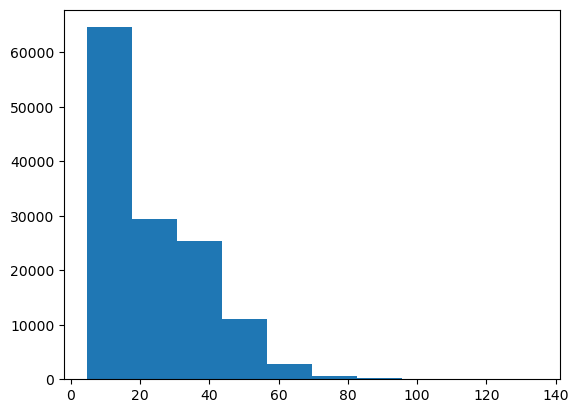

In [116]:
plt.hist(df.loc[mask, 'TEFF_ERR'])

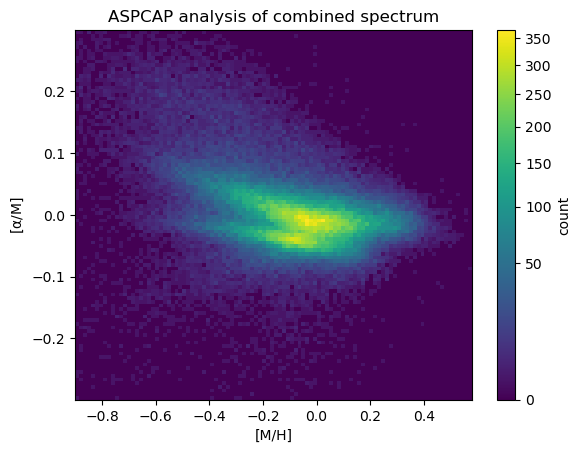

In [117]:
fig, ax = plt.subplots()

*_, im = ax.hist2d(df.loc[mask, 'M_H'], df.loc[mask, 'ALPHA_M'], bins=100, norm=mcolors.PowerNorm(1/2))

ax.set_xlabel('[M/H]')
ax.set_ylabel(r'$[\mathrm{\alpha/M}]$')
ax.set_title('ASPCAP analysis of combined spectrum')
fig.colorbar(im, label='count');

(4.7, 2.200676918029785)

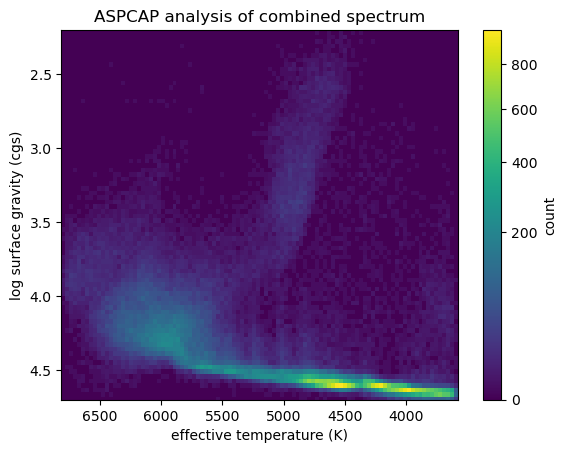

In [118]:
fig, ax = plt.subplots()

*_, im = ax.hist2d(df.loc[mask, 'TEFF'], df.loc[mask, 'LOGG'], bins=100, norm=mcolors.PowerNorm(1/2))
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel('effective temperature (K)')
ax.set_ylabel('log surface gravity (cgs)')
ax.set_title('ASPCAP analysis of combined spectrum')
fig.colorbar(im, label="count");
ax.set_ylim(4.7)